# Learning Goals

By the end of this tutorial you will: <br>
* Learn to search a survey for observations of a known target.
* Be able to plot a color-magnitude diagram.
* Use coordinates to plot a spectrum of a known member in a dwarf galaxy. 

# Introduction

Ultra-faint dwarf (UFD) galaxies are a subset of dwarf galaxies that are classified by having one hundred thousand to a few hundred thousand stars, making them the faintest galaxies in the universe. They differ from globular clusters in that they have a significant amount of dark matter which extends beyond the visible stellar matter. Because of their high concentration of dark matter, astronomers believe there could be unique insights into the early universe in UFD's. All UFD's that have been discovered are ancient systems that are believed to have formed only a few million years after the Big Bang.  
 
 
In this notebook, we will be searching the Pan-STARRS (PS1) catalog for data on an already discovered ultra-faint dwarf galaxy. These methods can be used to attempt to find new ultra-faint dwarf galaxies in the future. We will be referencing the paper "Milky Way Satellite Census. I. The Observational Selection Function for Milky Way Satellites in DES Y3 and Pan-STARRS DR1" by Drlica-Wagner et al. 2020 to choose our target, linked here: https://arxiv.org/abs/1912.03302 .

After searching PS1 for data on our target, we will use the data to plot a color-magnitude diagram of the galaxy and also plot an image of the field of view of our target. Lastly, we will choose another target, repeat the steps of gathering PS1 data, and compare both target's color-magnitude diagrams.  


# Imports

The following cell holds the imported packages. These packages are necessary for running the rest of the cells in this notebook. A description of each import is as follows:

* numpy to handle array functions
* pandas to handle date conversions
* fits from astropy.io for accessing FITS files
* Table from astropy.table for creating tidy tables of the data
* ascii from astropy.io for accessing the API results
* matplotlib.pyplot for plotting data
* Mast, Observations, and Catalogs from astroquery.mast for querying data and observations from the MAST archive
* requests for gathering data from the PS1 API
* units from astropy and SkyCoord from astropy.coordinates for converting RA and Dec into degrees

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import requests
from astropy.io import fits
from astropy.table import Table
from astroquery.mast import Mast
from astroquery.mast import Observations
from astroquery.mast import Catalogs
from astropy.io import ascii
from astropy import units as u
from astropy.coordinates import SkyCoord

# Searching PS1 Data for a Known Target

## Choosing a Target

Using Table 2 and Table 4 from Drlica-Wagner et al. 2020, we can choose a UFD that has PS1 data to search for. We will choose the UFD with the brightest magneitude that has been confirmed using PS1: **Leo I**. 

Table 2 lists the Right Ascention, Declination, and distance of **Leo I** which we will use to search the database.

### Gather necessary parameters 

Table 2 lists the Right Ascention, Declination, and distance of **Leo I** which we will use to search the database. Addiontioanally we will need the API url in order to search PS1 for this target. 

In [3]:
ra = "152.1146" #[deg]
dec = "12.3059" #[deg]
dist = "254" #[kpc]
radius = "0.1" #[deg] = 6 arcminutes

baseurl="https://catalogs.mast.stsci.edu/api/v0.1/panstarrs/" #this is the base url for querying the API
release = "dr1/" #you can also look at dr2 if you want
obj = "mean" #we will look at the mean data objects, dr1 only has mean and stack, dr2 has more options
condition = "nDetections.gte=1"
form = "csv"

## Retrieve PS1 data

The Panoramic Survey Telescope & Rapid Response System (Pan-STARRS) is a wide-field imaging facility developed at the University of Hawaii's Institute for Astronomy. We are going to be using the MAST API for PS1 to gather our data. Discriptions for the PS1 MeanObjectView table fields can be found here: https://outerspace.stsci.edu/display/PANSTARRS/PS1+MeanObjectView+table+fields . 

### Build API URL and Get Data

In [4]:
#now build the url to get the data from using the parameters we gathered
url = baseurl+release+obj+"?ra="+ra+"&dec="+dec+"&radius="+radius+"&"+condition+"&format="+form
print(url)

#Request data from the API
results = requests.get(url)
results = results.text

#Make a table from the results
tab = ascii.read(results)
tab

https://catalogs.mast.stsci.edu/api/v0.1/panstarrs/dr1/mean?ra=152.1146&dec=12.3059&radius=0.1&nDetections.gte=1&format=csv


objName,objAltName1,objAltName2,objAltName3,objID,uniquePspsOBid,ippObjID,surveyID,htmID,zoneID,tessID,projectionID,skyCellID,randomID,batchID,dvoRegionID,processingVersion,objInfoFlag,qualityFlag,raStack,decStack,raStackErr,decStackErr,raMean,decMean,raMeanErr,decMeanErr,epochMean,posMeanChisq,cx,cy,cz,lambda,beta,l,b,nStackObjectRows,nStackDetections,nDetections,ng,nr,ni,nz,ny,gQfPerfect,gMeanPSFMag,gMeanPSFMagErr,gMeanPSFMagStd,gMeanPSFMagNpt,gMeanPSFMagMin,gMeanPSFMagMax,gMeanKronMag,gMeanKronMagErr,gMeanKronMagStd,gMeanKronMagNpt,gMeanApMag,gMeanApMagErr,gMeanApMagStd,gMeanApMagNpt,gFlags,rQfPerfect,rMeanPSFMag,rMeanPSFMagErr,rMeanPSFMagStd,rMeanPSFMagNpt,rMeanPSFMagMin,rMeanPSFMagMax,rMeanKronMag,rMeanKronMagErr,rMeanKronMagStd,rMeanKronMagNpt,rMeanApMag,rMeanApMagErr,rMeanApMagStd,rMeanApMagNpt,rFlags,iQfPerfect,iMeanPSFMag,iMeanPSFMagErr,iMeanPSFMagStd,iMeanPSFMagNpt,iMeanPSFMagMin,iMeanPSFMagMax,iMeanKronMag,iMeanKronMagErr,iMeanKronMagStd,iMeanKronMagNpt,iMeanApMag,iMeanApMagErr,iMeanApMagStd,iMeanApMagNpt,iFlags,zQfPerfect,zMeanPSFMag,zMeanPSFMagErr,zMeanPSFMagStd,zMeanPSFMagNpt,zMeanPSFMagMin,zMeanPSFMagMax,zMeanKronMag,zMeanKronMagErr,zMeanKronMagStd,zMeanKronMagNpt,zMeanApMag,zMeanApMagErr,zMeanApMagStd,zMeanApMagNpt,zFlags,yQfPerfect,yMeanPSFMag,yMeanPSFMagErr,yMeanPSFMagStd,yMeanPSFMagNpt,yMeanPSFMagMin,yMeanPSFMagMax,yMeanKronMag,yMeanKronMagErr,yMeanKronMagStd,yMeanKronMagNpt,yMeanApMag,yMeanApMagErr,yMeanApMagStd,yMeanApMagNpt,yFlags,distance
str26,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64
PSO J100823.790+122039.383,-999,-999,-999,122811520992213622,1050851000053025,99982543736608,0,15576010741403,12281,1,1627,3,0.810778333629275,1050851,23279,3,436281344,52,152.09917326,12.3442196,0.0010000000474974513,0.0010000000474974513,152.09907248,12.34427145,0.09341999888420105,0.09341999888420105,56564.22314815,5.180300235748291,-0.8633261678799908,0.45712556999721743,0.21378526868886233,149.70221066643956,0.819953565398325,225.92201987114356,49.11424904776342,-999,2,4,0,1,2,1,0,-999.0,-999.0,-999.0,-999.0,0,-999.0,-999.0,-999.0,-999.0,-999.0,0,-999.0,-999.0,-999.0,0,16416,0.9430270195007324,21.811599731445312,0.18151800334453583,-999.0,1,21.811599731445312,21.811599731445312,21.733600616455078,0.2824319899082184,-999.0,1,21.387800216674805,0.18151800334453583,-999.0,1,16696,0.999396026134491,21.59269905090332,0.18915599584579468,-999.0,1,21.59269905090332,21.59269905090332,-999.0,-999.0,-999.0,1,21.994400024414062,0.18915599584579468,-999.0,1,16892216,0.9955959916114807,20.670400619506836,0.13200800120830536,-999.0,1,20.670400619506836,20.670400619506836,19.598100662231445,0.11607199907302856,-999.0,1,19.818199157714844,0.13200800120830536,-999.0,1,16892216,-999.0,-999.0,-999.0,-999.0,0,-999.0,-999.0,-999.0,-999.0,-999.0,0,-999.0,-999.0,-999.0,0,16416,0.04126119598397463
PSO J100823.670+122039.310,-999,-999,-999,122811520986493576,1050851000052812,99982543736395,0,15576010741500,12281,1,1627,3,0.718489429651284,1050851,23279,3,310456320,37,-999.0,-999.0,-999.0,-999.0,152.09862419,12.34425057,0.13402000069618225,0.13402000069618225,56698.41594907,-999.0,-0.8633226600927546

## Plot Color-Magnitude Diagram (CMD) of Leo I

Color-Magnitude Diagrams (CMD) are a common way astronomers visualize the photometric parameters of a stellar system. Where the stars of a system fall on a CMD can tell you things like the age of that system and therefore, what types of stars it is composed of. 

### Gather arrays for plotting
A CMD consists of the magnitudes in one filter (y-axis) vs the difference between the magnitudes in that filter and the magnitudes in another filter (x-axis). For this example we will plot the magntidues of **Leo I** in G vs the magnitude of **Leo I** in G-R. Additionally. we'll take a look at the CMd in R-I. In order to plot these CMDs we will need a couple arrays:

* Magnitudes in the G filter
* Magnitudes in the R filter
* Magnitudes in the I filter


In [82]:
g_mag = tab["gMeanApMag"] #mean aperture magntiude in G filter
r_mag = tab["rMeanApMag"] #mean aperture magntiude in R filter
i_mag = tab["iMeanApMag"] #mean aperture magntiude in I filter

#convert to numpy arrays for easy plotting
g_mag = np.array(g_mag)
r_mag = np.array(r_mag)
i_mag = np.array(i_mag)

#get the difference between the filters 
g_r = np.subtract(g_mag,r_mag)

#get the difference between the filters 
r_i = np.subtract(r_mag,i_mag)

### Plot CMD in g - r

Text(0, 0.5, 'g')

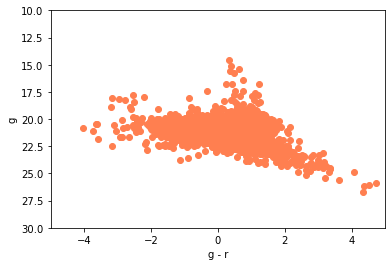

In [6]:
plt.scatter(g_r, g_mag, c = "coral")
plt.xlim(-5,5)
plt.ylim(30,10)
plt.xlabel("g - r")
plt.ylabel("g")

### Plot CMD in r - i

Text(0, 0.5, 'i')

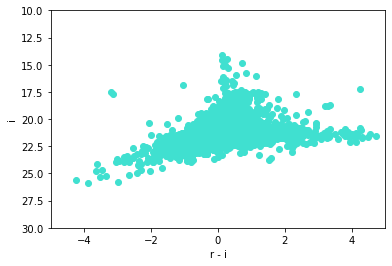

In [8]:
plt.scatter(r_i, i_mag, c = "turquoise")
plt.xlim(-5,5)
plt.ylim(30,10)
plt.xlabel("r - i")
plt.ylabel("i")

## Plot Field of View (FOV) of Leo I

### Build the url to the fits file of the region for our target


In [10]:
filters = "grizy"
size = "240" #extracted image size in pixels (0.25 arcsec/pixel)
form = "fits" #file format of the file we would like

color = "red" #you can change this, red is typically the i or r filter

#get the url to the PS1 images
images_url = "https://ps1images.stsci.edu/cgi-bin/ps1filenames.py?ra="+ra+"&dec="+dec+"&filters="+filters
#read the images data into a table
img_table = Table.read(images_url, format='ascii')

#get the first filename from the list of images
file = img_table['filename'][0]

#build the url to the fits file
fits_url = "https://ps1images.stsci.edu/cgi-bin/fitscut.cgi?ra="+ra+"&dec="+dec+"&size="+size+"&format="+form+"&"+color+"="+file

print(fits_url)

https://ps1images.stsci.edu/cgi-bin/fitscut.cgi?ra=152.1146&dec=12.3059&size=240&format=fits&red=/rings.v3.skycell/1627/003/rings.v3.skycell.1627.003.stk.g.unconv.fits


### Open the fits file and plot the image

Here we will plot the field of view containing our UFD, **Leo I**. Remember, it is *Ultra*-Faint!

Text(0.5, 1.0, 'Leo I - PS1 i')

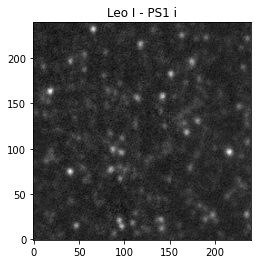

In [11]:
#open the fits file and get the data
fh = fits.open(fits_url)
fits_img = fh[0].data

# replace NaN values with zero for display
fits_img[np.isnan(fits_img)] = 0.0

#show the fits image
plt.imshow(fits_img,cmap="gray",origin="lower")
plt.title("Leo I - PS1 i")

In [13]:
#make a stacked color image by combining filters
filters = "grizy"
size = "240" #extracted image size in pixels (0.25 arcsec/pixel)
form = "fits" #file format of the file we would like

red = "red" #you can change this, red is typically the r or i filter
blue = "blue"
green = "green"

#get the url to the PS1 images
images_url = "https://ps1images.stsci.edu/cgi-bin/ps1filenames.py?ra="+ra+"&dec="+dec+"&filters="+filters
#read the images data into a table
img_table = Table.read(images_url, format='ascii')

#get the first filename from the list of images
file = img_table['filename'][0]

#build the url to the fits file
red_fits_url = "https://ps1images.stsci.edu/cgi-bin/fitscut.cgi?ra="+ra+"&dec="+dec+"&size="+size+"&format="+form+"&"+red+"="+file
blue_fits_url = "https://ps1images.stsci.edu/cgi-bin/fitscut.cgi?ra="+ra+"&dec="+dec+"&size="+size+"&format="+form+"&"+blue+"="+file
green_fits_url = "https://ps1images.stsci.edu/cgi-bin/fitscut.cgi?ra="+ra+"&dec="+dec+"&size="+size+"&format="+form+"&"+green+"="+file


print(fits_url)

https://ps1images.stsci.edu/cgi-bin/fitscut.cgi?ra=152.1146&dec=12.3059&size=240&format=fits&red=/rings.v3.skycell/1627/003/rings.v3.skycell.1627.003.stk.g.unconv.fits


Text(0.5, 1.0, 'Leo I - PS1 r,g,i')

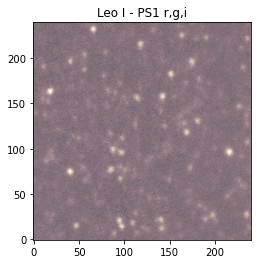

In [47]:
#open the fits file and get the data
fh_red = fits.open(red_fits_url)
fh_blue = fits.open(blue_fits_url)
fh_green = fits.open(green_fits_url)

red_fits_img = fh_red[0].data
blue_fits_img = fh_blue[0].data
green_fits_img = fh_green[0].data

# replace NaN values with zero for display
red_fits_img[np.isnan(red_fits_img)] = 0.0
blue_fits_img[np.isnan(blue_fits_img)] = 0.0
green_fits_img[np.isnan(green_fits_img)] = 0.0

cmap1 = colors.ListedColormap(['green', 'none'])
cmap2 = colors.ListedColormap(['red', 'none'])
cmap3 = colors.ListedColormap(['blue', 'none'])

#show the fits image
plt.imshow(green_fits_img,cmap="Greens_r",origin="lower", alpha = 0.35)
plt.imshow(red_fits_img,cmap="Reds_r",origin="lower", alpha = 0.45)
plt.imshow(blue_fits_img,cmap="Blues_r",origin="lower", alpha = 0.25)
plt.title("Leo I - PS1 r,g,i")

# Repeat with new target and compare

Now we will repeat the same process for a new target, **Draco II** and compare it with **Leo I**. The discovery paper for **Draco II** can be found here: https://iopscience.iop.org/article/10.1088/0004-637X/813/1/44 . 

## Retrieve data from MAST 
This is the same method as before, just using the position of **Draco II** instead. You can find the RA and Dec of **Draco II** in Table I of its discovery paper, Laevens et al 2015. It is also listed on SIMBAD. Both are linked in the "Additional Resources" section below.

In [76]:
#read RA and Dec from either SIMBAD or Table 1 in Laevens et al 2015
r = '15:52:47.6'
d = '+64:33:55'

#Convert the RA and Dec to degrees
c = SkyCoord(r+d, unit=(u.hourangle, u.deg))
draco_ra = str(c.ra.degree)
draco_dec = str(c.dec.degree)

#now build the url to get the data from using the parameters we gathered
draco_url = baseurl+release+obj+"?ra="+draco_ra+"&dec="+draco_dec+"&radius="+radius+"&"+condition+"&format="+form
print(draco_url)

#Request data from the API
draco_results = requests.get(draco_url)
draco_results = draco_results.text

#Make a table from the results
draco_tab = ascii.read(draco_results)
draco_tab

https://catalogs.mast.stsci.edu/api/v0.1/panstarrs/dr1/mean?ra=238.1983333333333&dec=64.56527777777778&radius=0.1&nDetections.gte=1&format=csv


objName,objAltName1,objAltName2,objAltName3,objID,uniquePspsOBid,ippObjID,surveyID,htmID,zoneID,tessID,projectionID,skyCellID,randomID,batchID,dvoRegionID,processingVersion,objInfoFlag,qualityFlag,raStack,decStack,raStackErr,decStackErr,raMean,decMean,raMeanErr,decMeanErr,epochMean,posMeanChisq,cx,cy,cz,lambda,beta,l,b,nStackObjectRows,nStackDetections,nDetections,ng,nr,ni,nz,ny,gQfPerfect,gMeanPSFMag,gMeanPSFMagErr,gMeanPSFMagStd,gMeanPSFMagNpt,gMeanPSFMagMin,gMeanPSFMagMax,gMeanKronMag,gMeanKronMagErr,gMeanKronMagStd,gMeanKronMagNpt,gMeanApMag,gMeanApMagErr,gMeanApMagStd,gMeanApMagNpt,gFlags,rQfPerfect,rMeanPSFMag,rMeanPSFMagErr,rMeanPSFMagStd,rMeanPSFMagNpt,rMeanPSFMagMin,rMeanPSFMagMax,rMeanKronMag,rMeanKronMagErr,rMeanKronMagStd,rMeanKronMagNpt,rMeanApMag,rMeanApMagErr,rMeanApMagStd,rMeanApMagNpt,rFlags,iQfPerfect,iMeanPSFMag,iMeanPSFMagErr,iMeanPSFMagStd,iMeanPSFMagNpt,iMeanPSFMagMin,iMeanPSFMagMax,iMeanKronMag,iMeanKronMagErr,iMeanKronMagStd,iMeanKronMagNpt,iMeanApMag,iMeanApMagErr,iMeanApMagStd,iMeanApMagNpt,iFlags,zQfPerfect,zMeanPSFMag,zMeanPSFMagErr,zMeanPSFMagStd,zMeanPSFMagNpt,zMeanPSFMagMin,zMeanPSFMagMax,zMeanKronMag,zMeanKronMagErr,zMeanKronMagStd,zMeanKronMagNpt,zMeanApMag,zMeanApMagErr,zMeanApMagStd,zMeanApMagNpt,zFlags,yQfPerfect,yMeanPSFMag,yMeanPSFMagErr,yMeanPSFMagStd,yMeanPSFMagNpt,yMeanPSFMagMin,yMeanPSFMagMax,yMeanKronMag,yMeanKronMagErr,yMeanKronMagStd,yMeanKronMagNpt,yMeanApMag,yMeanApMagErr,yMeanApMagStd,yMeanApMagNpt,yFlags,distance
str26,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64
PSO J155242.521+643922.008,-999,-999,-999,185582381771718078,965744000052117,330330229754776,0,14835178014234,18558,1,2525,16,0.00521419384071063,965744,76911,3,268959744,32,-999.0,-999.0,-999.0,-999.0,238.17717177,64.65611358,-999.0,-999.0,-999.0,-999.0,-0.2257084789794473,-0.36370686416313924,0.9037549443723116,173.47937311117258,76.86900943776776,98.40747380213848,42.84199853261847,-999,0,1,0,0,1,0,0,-999.0,-999.0,-999.0,-999.0,0,-999.0,-999.0,-999.0,-999.0,-999.0,0,-999.0,-999.0,-999.0,0,0,-999.0,-999.0,-999.0,-999.0,0,-999.0,-999.0,-999.0,-999.0,-999.0,0,-999.0,-999.0,-999.0,0,0,-999.0,-999.0,-999.0,-999.0,0,-999.0,-999.0,18.79210090637207,0.03462100028991699,-999.0,1,-999.0,-999.0,-999.0,0,24,-999.0,-999.0,-999.0,-999.0,0,-999.0,-999.0,-999.0,-999.0,-999.0,0,-999.0,-999.0,-999.0,0,0,-999.0,-999.0,-999.0,-999.0,0,-999.0,-999.0,-999.0,-999.0,-999.0,0,-999.0,-999.0,-999.0,0,0,0.09128783461793072
PSO J155240.660+643920.346,-999,-999,-999,185582381694537556,965744000051666,330330229754325,0,14835178015380,18558,1,2525,16,0.693972793122728,965744,76911,3,310456320,37,-999.0,-999.0,-999.0,-999.0,238.16940567,64.65564004,0.19639000296592712,0.19639000296592712,55351.26423611,-999.0,-0.22576171461067157,-0.3636826134476192,0.903751406578136,173.47563853521885,76.86576834204564,98.40921679291135,42.84509553747844,-999,0,1,0,1,0,0,0,-999.0,-999.0,-999.0,-999.0,0,-999.0,-999.0,-999.0,-999.0,-999.0,0,-999.0,-999.0,-999.0,0,0,0.9997180104255676,21.93560028076172,0.1958169937133789,-999.0,1,21.93560028076172,21.93560028076172,21.4783992767334,0.292279988527298,-999.0,1,21.415700912475586,

## Plot CMD of Draco II

Gather the arrays for plotting the color-magnitude diagrams using the same method as before. 

In [91]:
draco_g_mag = draco_tab["gMeanApMag"] #mean aperture magntiude in G filter
draco_r_mag = draco_tab["rMeanApMag"] #mean aperture magntiude in R filter
draco_i_mag = draco_tab["iMeanApMag"] #mean aperture magntiude in I filter

#convert to numpy arrays for easy plotting
draco_g_mag = np.array(draco_g_mag)
draco_r_mag = np.array(draco_r_mag)
draco_i_mag = np.array(draco_i_mag)

#get the difference between the filters 
draco_g_r = np.subtract(draco_g_mag,draco_r_mag)
draco_r_i = np.subtract(draco_r_mag,draco_i_mag)

### Plot CMD in g-r

Text(0, 0.5, 'g')

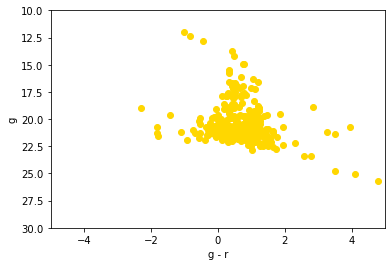

In [92]:
plt.scatter(draco_g_r, draco_g_mag, c = "gold")
plt.xlim(-5,5)
plt.ylim(30,10)
plt.xlabel("g - r")
plt.ylabel("g")

### Plot CMD in r-i

Text(0, 0.5, 'i')

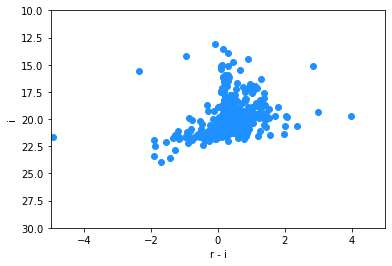

In [93]:
plt.scatter(draco_r_i, draco_i_mag, c = "dodgerblue")
plt.xlim(-5,5)
plt.ylim(30,10)
plt.xlabel("r - i")
plt.ylabel("i")

## Let's overplot the CMDs for Leo I and Draco II 

To compare the compositions of **Leo I** and **Draco II**, we can plot their Color-Magnitude Diagrams on top of each other to see how they differ. 

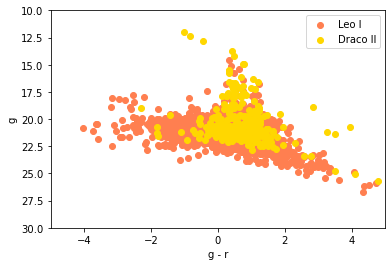

In [95]:
plt.scatter(g_r, g_mag, c = "coral", label = "Leo I")
plt.scatter(draco_g_r, draco_g_mag, c = "gold", label = "Draco II")
plt.xlim(-5,5)
plt.ylim(30,10)
plt.xlabel("g - r")
plt.ylabel("g")
plt.legend()

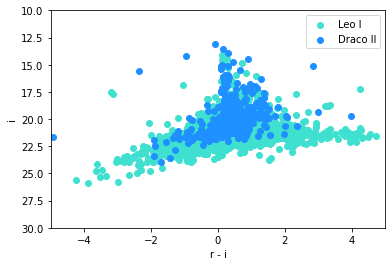

In [100]:
plt.scatter(r_i, i_mag, c = "turquoise", label = "Leo I")
plt.scatter(draco_r_i, draco_i_mag, c = "dodgerblue", label = "Draco II")
plt.xlim(-5,5)
plt.ylim(30,10)
plt.xlabel("r - i")
plt.ylabel("i")
plt.legend()

# Plot a Spectrum for a member of Leo I
 
We can use this resource from the SAGA databse to find an individual member of **Leo I**: http://sagadatabase.jp/Data/starlist.html . From here we can use the coordinates of a member, search the MAST archive for observations of it, and plot its spectrum.

Let's take a look at member number 94, most recently referred to as LeoI72134 by Kirby et al. 2010, http://sagadatabase.jp/Data/html/SAGA_LeoI_000094.html, we are choosing this star because it has multiple citations so we should be able to learn a lot about it. 

### Convert RA and Dec to Degrees

The coordinates from the SAGA database are in units of hour angle while the MAST archive needs units of degrees, so we will have to convert the coordinates.

In [11]:
#Get the RA and Dec from the SAGA Database
ra = "10 08 01.88"
dec = "+12 17 55.5" 

#Convert the RA and Dec into degrees
c = SkyCoord(ra+dec, unit=(u.hourangle, u.deg))
ra = c.ra.deg
dec = c.dec.deg

(152.0078333333333, 12.29875)

### Query MAST Archive for observations of LeoI72134

In [2]:
#abstract search of hst for ideas, if there are hst spectra from individual stars 

#try to get spectra from cone search of ind. stars in the field - we're trying to find membership (not panstarrs)

#plot spectra and see what emis/abso lines you see

#cross match PS1 data for galaxy with ind. stars 

# Exercises

## 1. Plot Field of View of Draco II 

Can you recreate the steps we took for **Leo I** to plot the field of view of **Draco II** in black and white and in color? 


# About this Notebook

**Author:** Emma Lieb <br>
**Last Updated:** Jul 27th 2022

# Citations

* [Citation for `astropy`](https://www.astropy.org/acknowledging.html)